이전 글에서 Apache Toree Scala Kernel 을 이용해서 Jupyter 에서 Apache Spark을 사용하는 법을 알아봤습니다.

https://comafire.github.io/posts/2016-Jupyter-Spark/

Spark에서 Scala를 사용하면서 아쉬웠던 점 중 하나가 Visualization이 약하다는 점일 것입니다.

하지만, IBM에서 만든 Brunel을 이용하면 Jupyter의 Apache Toree Scala Kernel에서 Magic 키워드로 간단하게 차트들을 그릴수 있습니다.

관련 링크들입니다.

* Gtihub: https://github.com/Brunel-Visualization/Brunel
* Jupyter Brunel with Apache Toree: https://github.com/Brunel-Visualization/Brunel/tree/master/spark-kernel
* Blog글: http://blog.ibmjstart.net/2016/07/18/visualizing-big-data-spark-scala/
* Cookbook: https://github.com/Brunel-Visualization/Brunel/wiki/Brunel-Visualization-Cookbook
* Docs: http://brunel.mybluemix.net/docs/

사용법은 간단하게 아래와 같이 Toree Magic 키워드로 라이브러리를 추가해주면 됩니다.

In [1]:
%AddJar -magic https://brunelvis.org/jar/spark-kernel-brunel-all-2.0.jar

Starting download from https://brunelvis.org/jar/spark-kernel-brunel-all-2.0.jar
Finished download of spark-kernel-brunel-all-2.0.jar


추가적으로 sample csv 파일을 읽기 위해 spark-csv package 의존성을 추가해줍니다.
이또한 간편하게 Toree Magic 키워드를 이용해 아래와 같이 해주면 됩니다.

In [2]:
%AddDeps com.databricks spark-csv_2.11 1.4.0 --transitive

Marking com.databricks:spark-csv_2.11:1.4.0 for download
Preparing to fetch from:
-> file:/var/folders/0h/gc62b17x2vb0fyd8px3lbln421xhr9/T/toree_add_deps3995507367232307851/
-> https://repo1.maven.org/maven2
-> New file at /var/folders/0h/gc62b17x2vb0fyd8px3lbln421xhr9/T/toree_add_deps3995507367232307851/https/repo1.maven.org/maven2/com/univocity/univocity-parsers/1.5.1/univocity-parsers-1.5.1.jar
-> New file at /var/folders/0h/gc62b17x2vb0fyd8px3lbln421xhr9/T/toree_add_deps3995507367232307851/https/repo1.maven.org/maven2/com/databricks/spark-csv_2.11/1.4.0/spark-csv_2.11-1.4.0.jar
-> New file at /var/folders/0h/gc62b17x2vb0fyd8px3lbln421xhr9/T/toree_add_deps3995507367232307851/https/repo1.maven.org/maven2/org/apache/commons/commons-csv/1.1/commons-csv-1.1.jar


아래의 간단한 코드를 이용해서 웹상의 csv 샘플 데이터를 다운받아 저장합니다.

In [3]:
import scala.io.Source
import java.io._
val html = Source.fromURL("https://raw.githubusercontent.com/Brunel-Visualization/Brunel/master/python/examples/data/cars.csv")
val writer = new PrintWriter(new File("cars.csv"))
writer.write(html.mkString)
writer.close()

이제 spark-csv 패키지 라이브러리를 이용해 데이터를 읽어봅니다.

In [4]:
val dfCars = sqlContext.read.format("com.databricks.spark.csv").option("header", "true").load("cars.csv")
dfCars.show(3)

+---+---------+------+----------+------+------------+----+--------+--------------------+
|mpg|cylinders|engine|horsepower|weight|acceleration|year|  origin|                name|
+---+---------+------+----------+------+------------+----+--------+--------------------+
| 18|        8|   307|       130|  3504|          12|  70|American|chevrolet chevell...|
| 15|        8|   350|       165|  3693|        11.5|  70|American|   buick skylark 320|
| 18|        8|   318|       150|  3436|          11|  70|American|  plymouth satellite|
+---+---------+------+----------+------+------------+----+--------+--------------------+
only showing top 3 rows



이제 Brunel을 이용해서 데이터를 시각화 해보겠습니다. 상당히 직관적인 문법으로 데이터의 시각화가 가능합니다. 

In [5]:
%%Brunel
data('dfCars') x(origin) y(horsepower) mean(horsepower) bar tooltip(#all) :: width=300, height=300

Brunel를 이용하면 Jupyter에서 역동적인 그래프 출력이 가능하지만, Plot라이브러리처럼 Image를 만들어주는 방식이 아니기때문에 Pelican을 통해서 변환이 안되는 아이러니가 있습니다. ㅋ

그래서 여기서는 출력 그래프를 스크린 샷으로 저장한뒤 Jupyter 커널을 강제로 Python으로 변경해서 이미지를 코드로 불러와 표시해보겠습니다.

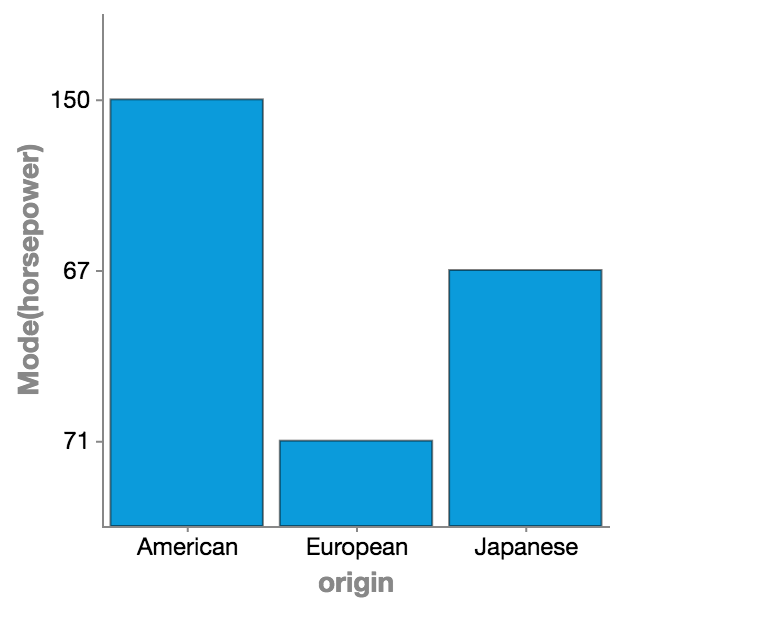

In [2]:
from IPython.display import Image
Image('../galleries/2016-Jupyter-Spark-Brunel-00.png', width=512)

Jupyter로 블로깅할때는 활용을 못하겠네요.. ㅋ

더 상세한 부분은 상단의 Doc 링크를 활용하세요..